## Data Preparation

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb

In [0]:
(Xtrain,Ytrain),(Xtest,Ytest) = imdb.load_data(num_words=10000)

In [109]:
print(Xtest.shape)
print(Ytest.shape)

(25000,)
(25000,)


In [110]:
print(Ytrain.shape)
print(Ytest.shape)

(25000,)
(25000,)


In [0]:
mapping = imdb.get_word_index()

In [112]:
print(len(mapping))

88584


In [0]:
inverse_mapping = dict([(value,key) for key,value in mapping.items()])

In [114]:
print(len(inverse_mapping))

88584


In [0]:
test1 = " ".join([inverse_mapping.get(ix) for ix in Xtrain[1]])        

In [116]:
print(test1)

the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them


In [0]:
def vectorise(corpus,dims=10000):

  output = np.zeros((corpus.shape[0],dims))
  for i,idx in enumerate(corpus):
    output[i,idx] = 1

  return output  

In [0]:
Xtrain = vectorise(Xtrain)

In [0]:
Xtest = vectorise(Xtest)

In [120]:
print(Xtrain.shape)
print(Xtest.shape)

(25000, 10000)
(25000, 10000)


In [121]:
print(Xtrain[0])

[0. 1. 1. ... 0. 0. 0.]


## Model Architecture

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=16,activation='relu',input_dim=10000))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [126]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
xval = Xtrain[:5000]
Xtrain_new = Xtrain[5000:]

yval = Ytrain[:5000]
Ytrain_new = Ytrain[5000:]

In [0]:
modelCheckPoint = ModelCheckpoint(filepath='./model.h5',monitor='val_accuracy',verbose=1,save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy',min_delta=0.005,patience=10,verbose=1,restore_best_weights=True)
myCallBacks = [modelCheckPoint,earlyStopping]

In [129]:
hist = model.fit(Xtrain_new,Ytrain_new,batch_size=512,epochs=20,validation_data=(xval,yval),callbacks=myCallBacks)

Epoch 1/20
38/40 [===========================>..] - ETA: 0s - loss: 0.5564 - accuracy: 0.7551
Epoch 00001: val_accuracy improved from -inf to 0.85620, saving model to ./model.h5
40/40 [==============================] - 1s 18ms/step - loss: 0.5491 - accuracy: 0.7576 - val_loss: 0.4010 - val_accuracy: 0.8562
Epoch 2/20
37/40 [==========================>...] - ETA: 0s - loss: 0.3019 - accuracy: 0.9024
Epoch 00002: val_accuracy improved from 0.85620 to 0.89240, saving model to ./model.h5
40/40 [==============================] - 1s 14ms/step - loss: 0.3015 - accuracy: 0.9022 - val_loss: 0.2903 - val_accuracy: 0.8924
Epoch 3/20
37/40 [==========================>...] - ETA: 0s - loss: 0.2054 - accuracy: 0.9329
Epoch 00003: val_accuracy did not improve from 0.89240
40/40 [==============================] - 1s 13ms/step - loss: 0.2077 - accuracy: 0.9323 - val_loss: 0.2768 - val_accuracy: 0.8910
Epoch 4/20
37/40 [==========================>...] - ETA: 0s - loss: 0.1608 - accuracy: 0.9462
Epoch 00

In [0]:
histt = hist.history

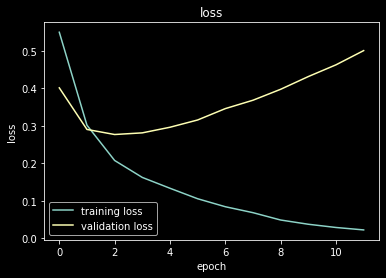

In [131]:
plt.style.use('dark_background')
plt.plot(histt['loss'],label='training loss')
plt.plot(histt['val_loss'],label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss')
plt.legend()
plt.show()

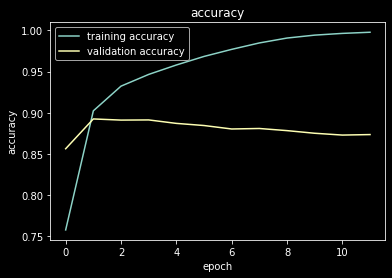

In [132]:
plt.style.use('dark_background')
plt.plot(histt['accuracy'],label='training accuracy')
plt.plot(histt['val_accuracy'],label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

In [135]:
model.evaluate(Xtrain_new,Ytrain_new)

625/625 [==============================] - 2s 2ms/step - loss: 0.2199 - accuracy: 0.9317


[0.2199215292930603, 0.9317499995231628]

In [136]:
model.evaluate(xval,yval)

157/157 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.8924


[0.28953781723976135, 0.8924000263214111]

In [137]:
model.evaluate(Xtest,Ytest)

782/782 [==============================] - 2s 3ms/step - loss: 0.3008 - accuracy: 0.8840


[0.3007938265800476, 0.8840399980545044]